# Linear decomposition of approximate multi-controlled single qubit gates

## libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qclib.gates.mcu import MCU
from cost import Cost

## objects and parameters

In [15]:
u = np.array([[0,1], [1,0]]) # X gate
cost = Cost
error = 1e-3
mcu_approx_dummy = MCU(u, num_controls=100, error=error)
base_ctrl_qubits_mcx = mcu_approx_dummy._get_num_base_ctrl_qubits(u, error)

n_base = base_ctrl_qubits_mcx

print(
    'The base circuit have %d qubits for error = %.3f' 
    %(n_base, error)
)

The base circuit have 13 qubits for error = 0.001


<a id='figure-6'></a> 
## Fig. 6. Comparison on the number of CNOTs between the method proposed Theorem 1 from this work against Lemma 7.8 from Ref. [8], for ϵ = 0.001.

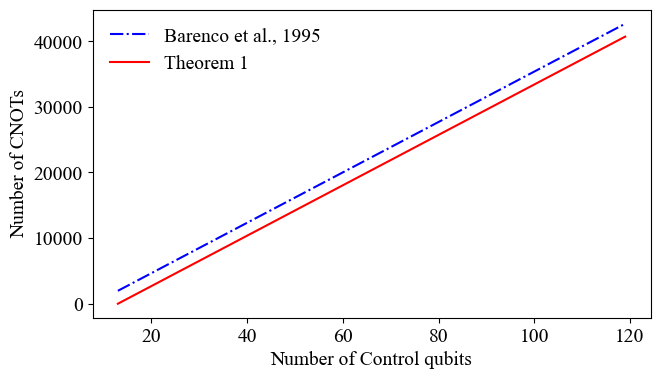

In [16]:
x0 = np.arange(n_base, 120)
x1 = x0[5:]

k_barenco = Cost.get_k_barenco(error)

y_0 = [cost.c_barenco_rec(xi, 0, k_barenco) for xi in x0]
y_1 = cost.theorem_1(n_base, x0)

plt.plot(x0, y_0, 'b-.')
plt.plot(x0, y_1, 'r-')


plt.xlabel('Number of Control qubits')
plt.ylabel('Number of CNOTs')

plt.legend(
    ('Barenco et al., 1995', 'Theorem 1', 'Theorem 3'),
    loc = 'upper left', shadow=False, frameon=False,
)

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.show()

---

<a id='figure-10'></a>
## Fig. 8. Analytical comparison of the number of CNOTs in the multi-controlled gate using multiple copies of the original SU(2) decomposition scheme.

The graph displays the CNOT count for different numbers of target qubits, all with six control qubits.

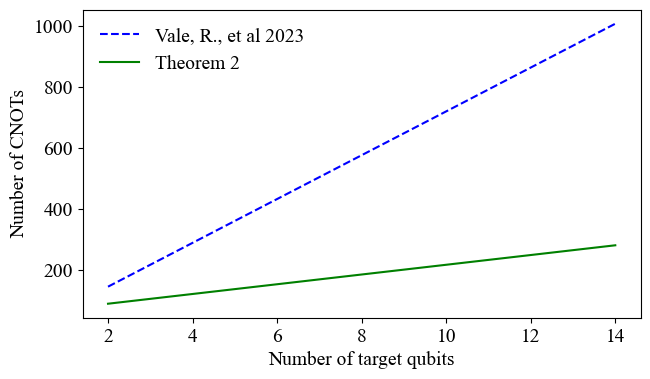

In [17]:
x0 = list(range(2, 15))
k = 6

original_su2_plot = [
    cost.original_su2(k, xi) for xi in x0]

mt_su2_plot = [
    cost.mt_su2(k, xi) for xi in x0]

plt.plot(x0, original_su2_plot, 'b--')
plt.plot(x0, mt_su2_plot, 'g-')

plt.legend(
    ('Vale, R., et al 2023', 'Theorem 2', 'new theorem 2'),
    loc='upper left', shadow=False, frameon=False,
)

plt.rcParams.update({
    "figure.figsize": (7.2, 4.0),
    "font.family": "Times New Roman",
    "font.size": 14
})

plt.xlabel('Number of target qubits')
plt.ylabel('Number of CNOTs')

plt.show()